In [66]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import glob

In [67]:
# Set style and color palette
sns.set(style='darkgrid', palette='mako')

plot_settings = {
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'figure.dpi': 140,
    'axes.titlepad': 15,
    'axes.labelpad': 15,
    'figure.titlesize': 24,
    'figure.titleweight': 'bold',
}

plt.rcParams.update(plot_settings)

In [68]:
root_folder = '/kaggle/input/data/'

In [69]:
file_path_data_entry = root_folder + 'Data_Entry_2017.csv'
df = pd.read_csv(file_path_data_entry)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [70]:
# Initialize an empty list to store the image paths
image_paths = []

for i in range(1, 13):
    # Create a string with the folder name for each iteration
    folder_name = f'{root_folder}images_{i:03}'
    # Get all files in the current subfolder
    files_in_subfolder = glob.glob(f'{folder_name}/images/*')
    # Extend the list of image paths with the paths from the current subfolder
    image_paths.extend(files_in_subfolder)

# Check the length of the image paths list and adding it to the df
len(image_paths)
assert len(image_paths) == 112120, f"Expected 112120 images, but found {len(image_paths)}"
df['Image Path'] = image_paths

In [71]:
labels = df['Finding Labels'].str.split(
            '|').explode().unique()
labels.sort()
labels

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype=object)

In [72]:
df = df[['Image Path', 'Finding Labels', 'Patient ID']]
# Make a list of all the labels
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema',
            'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening',
            'Pneumonia', 'Pneumothorax']

for disease in labels:
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0)
    
df.head()

,Image Path,Finding Labels,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,/kaggle/input/data/images_001/images/00000502_...,Cardiomegaly,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,/kaggle/input/data/images_001/images/00001255_...,Cardiomegaly|Emphysema,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,/kaggle/input/data/images_001/images/00001304_...,Cardiomegaly|Effusion,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,/kaggle/input/data/images_001/images/00000003_...,No Finding,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,/kaggle/input/data/images_001/images/00000926_...,Hernia,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Number of Diseases per Patient')

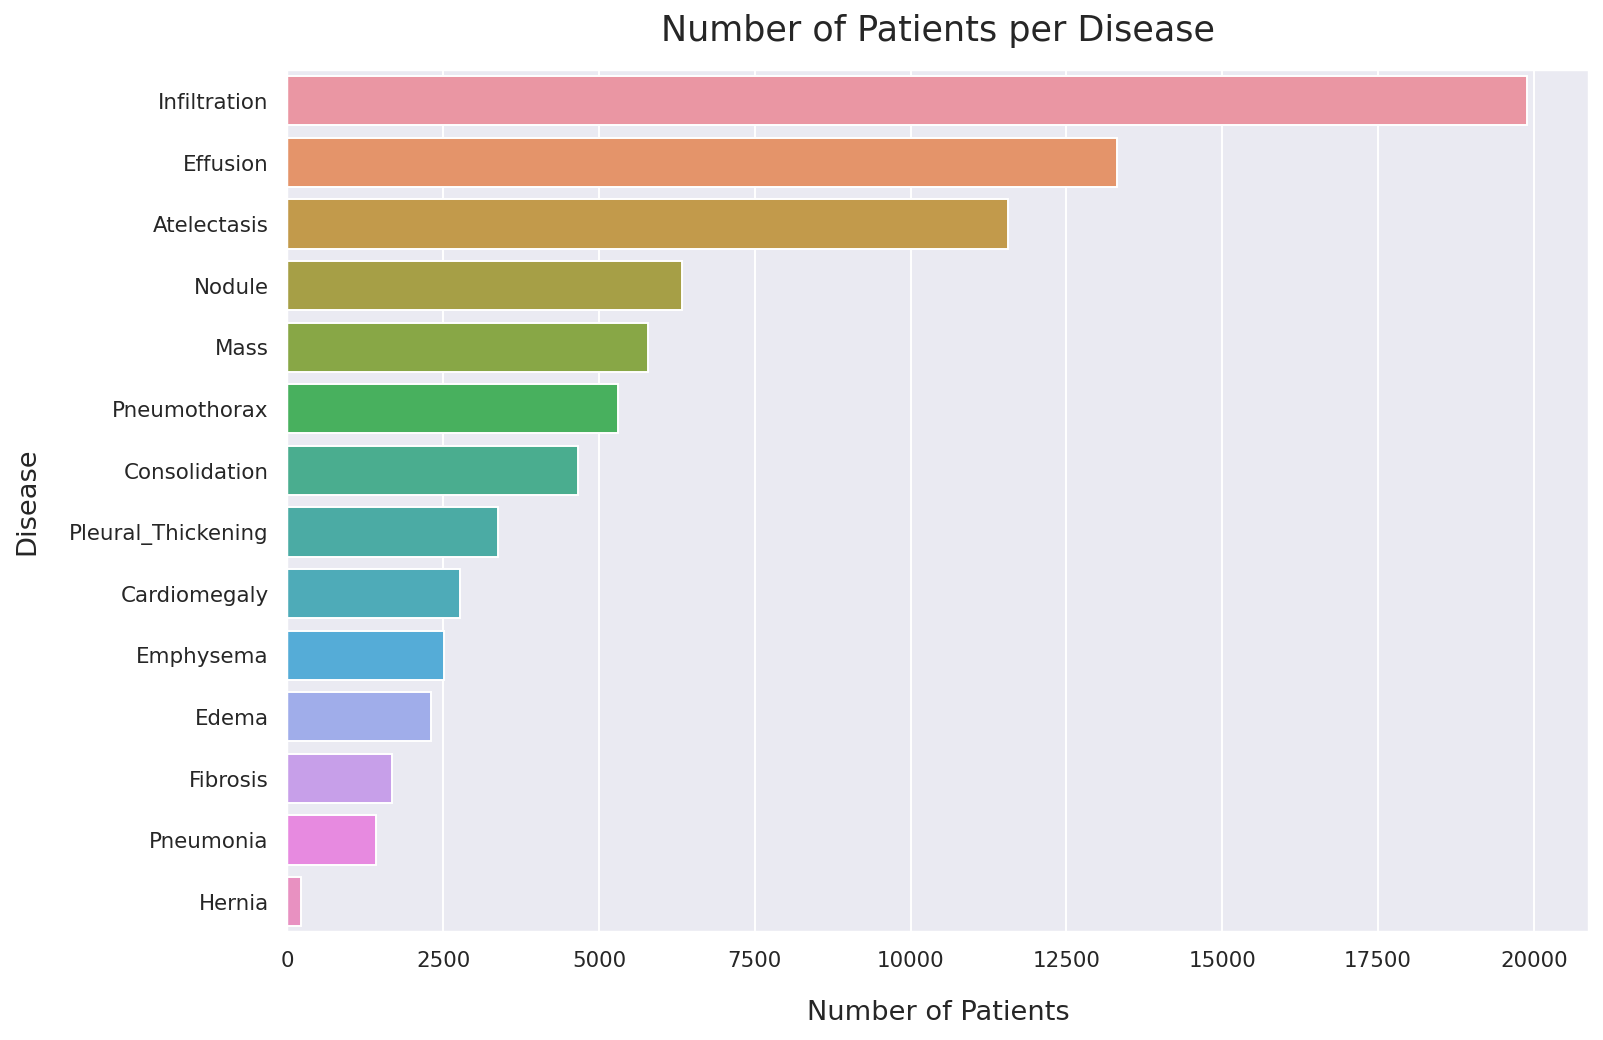

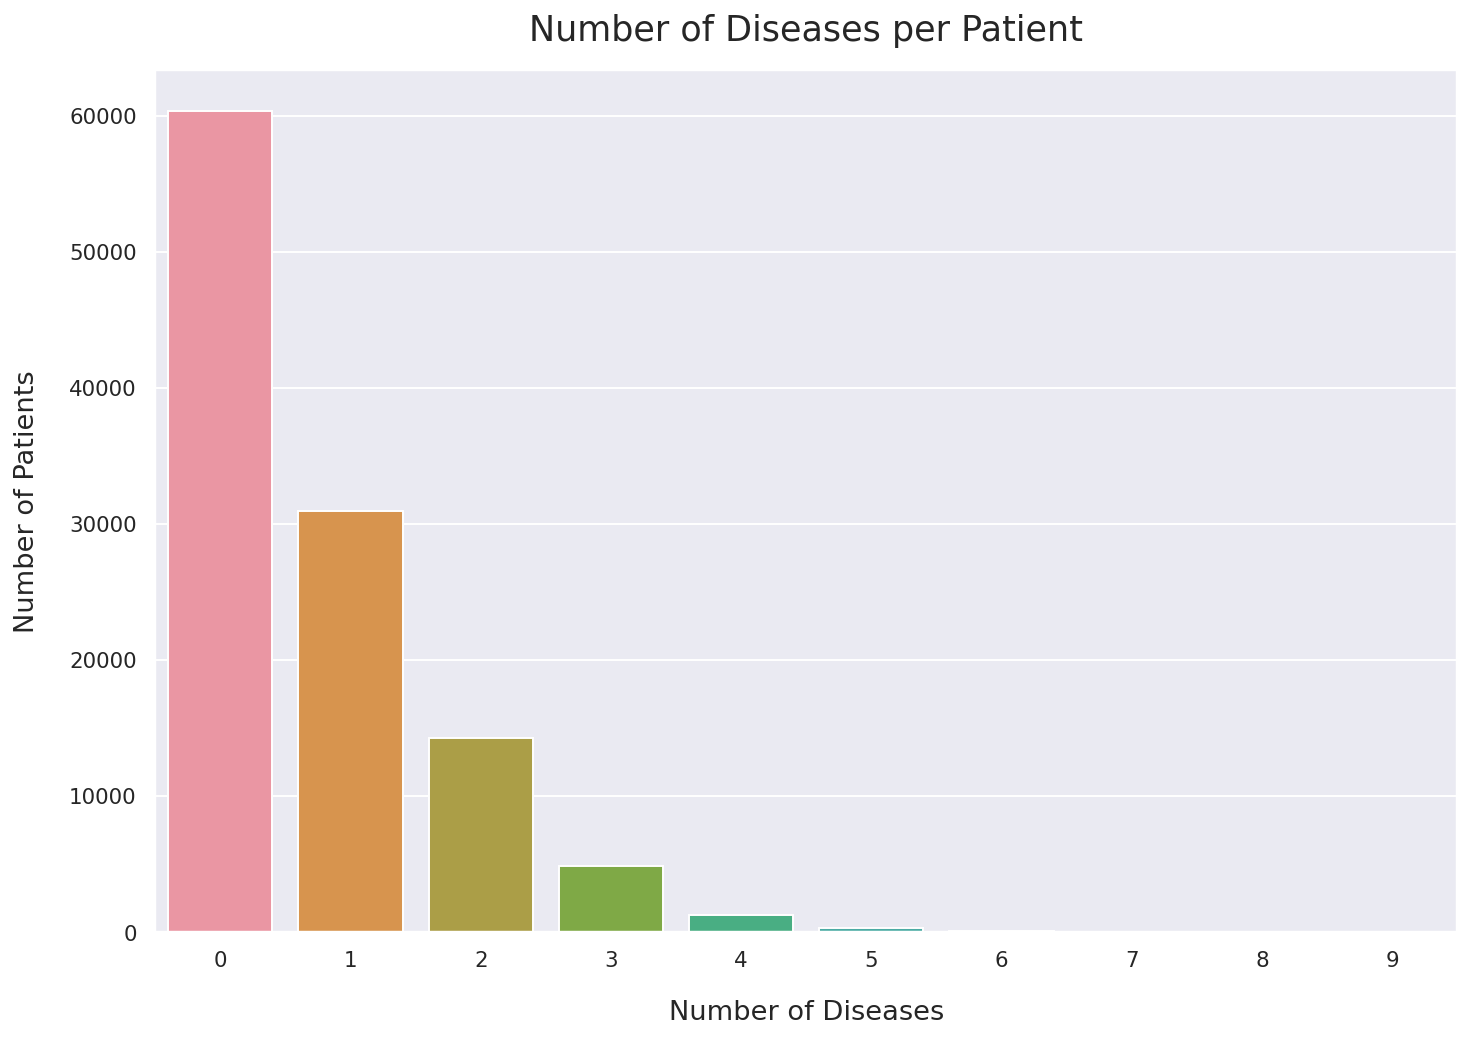

In [73]:
# What are the label counts for each disease?
label_counts = df[labels].sum().sort_values(ascending=False)

# Plot the value counts
plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.values, y=label_counts.index)
plt.xlabel('Number of Patients')
plt.ylabel('Disease')
plt.title('Number of Patients per Disease')

# How many diseases does each patient have?
label_counts = df[labels].sum(axis=1).value_counts().sort_index()
# Plot the value counts
plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Number of Diseases')
plt.ylabel('Number of Patients')
plt.title('Number of Diseases per Patient')

In figure 1 one can see the number of patients having "Infiltration" is very high with respect to the other diseases, especially compared to the 5-6 different on the bottom of the graph

In figure 2 one can see the number of patients having zero diseases is very high and seems to be the majority of the whole dataset, as Laars mentioned previously

# Only find x-rays with one finding label

In [74]:
df['Finding_Sum'] = df.iloc[:, 3:].sum(axis=1)
single_label_df = df[df['Finding_Sum'] == 1]
single_label_df.head()

,Image Path,Finding Labels,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Finding_Sum
0,/kaggle/input/data/images_001/images/00000502_...,Cardiomegaly,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,/kaggle/input/data/images_001/images/00000926_...,Hernia,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,/kaggle/input/data/images_001/images/00000618_...,Hernia,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,/kaggle/input/data/images_001/images/00000370_...,Hernia,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,/kaggle/input/data/images_001/images/00001043_...,Hernia,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [75]:
single_label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30963 entries, 0 to 112108
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image Path          30963 non-null  object
 1   Finding Labels      30963 non-null  object
 2   Patient ID          30963 non-null  int64 
 3   Atelectasis         30963 non-null  int64 
 4   Cardiomegaly        30963 non-null  int64 
 5   Consolidation       30963 non-null  int64 
 6   Edema               30963 non-null  int64 
 7   Effusion            30963 non-null  int64 
 8   Emphysema           30963 non-null  int64 
 9   Fibrosis            30963 non-null  int64 
 10  Hernia              30963 non-null  int64 
 11  Infiltration        30963 non-null  int64 
 12  Mass                30963 non-null  int64 
 13  Nodule              30963 non-null  int64 
 14  Pleural_Thickening  30963 non-null  int64 
 15  Pneumonia           30963 non-null  int64 
 16  Pneumothorax        30963 

Text(0.5, 1.0, 'Number of Patients per Disease')

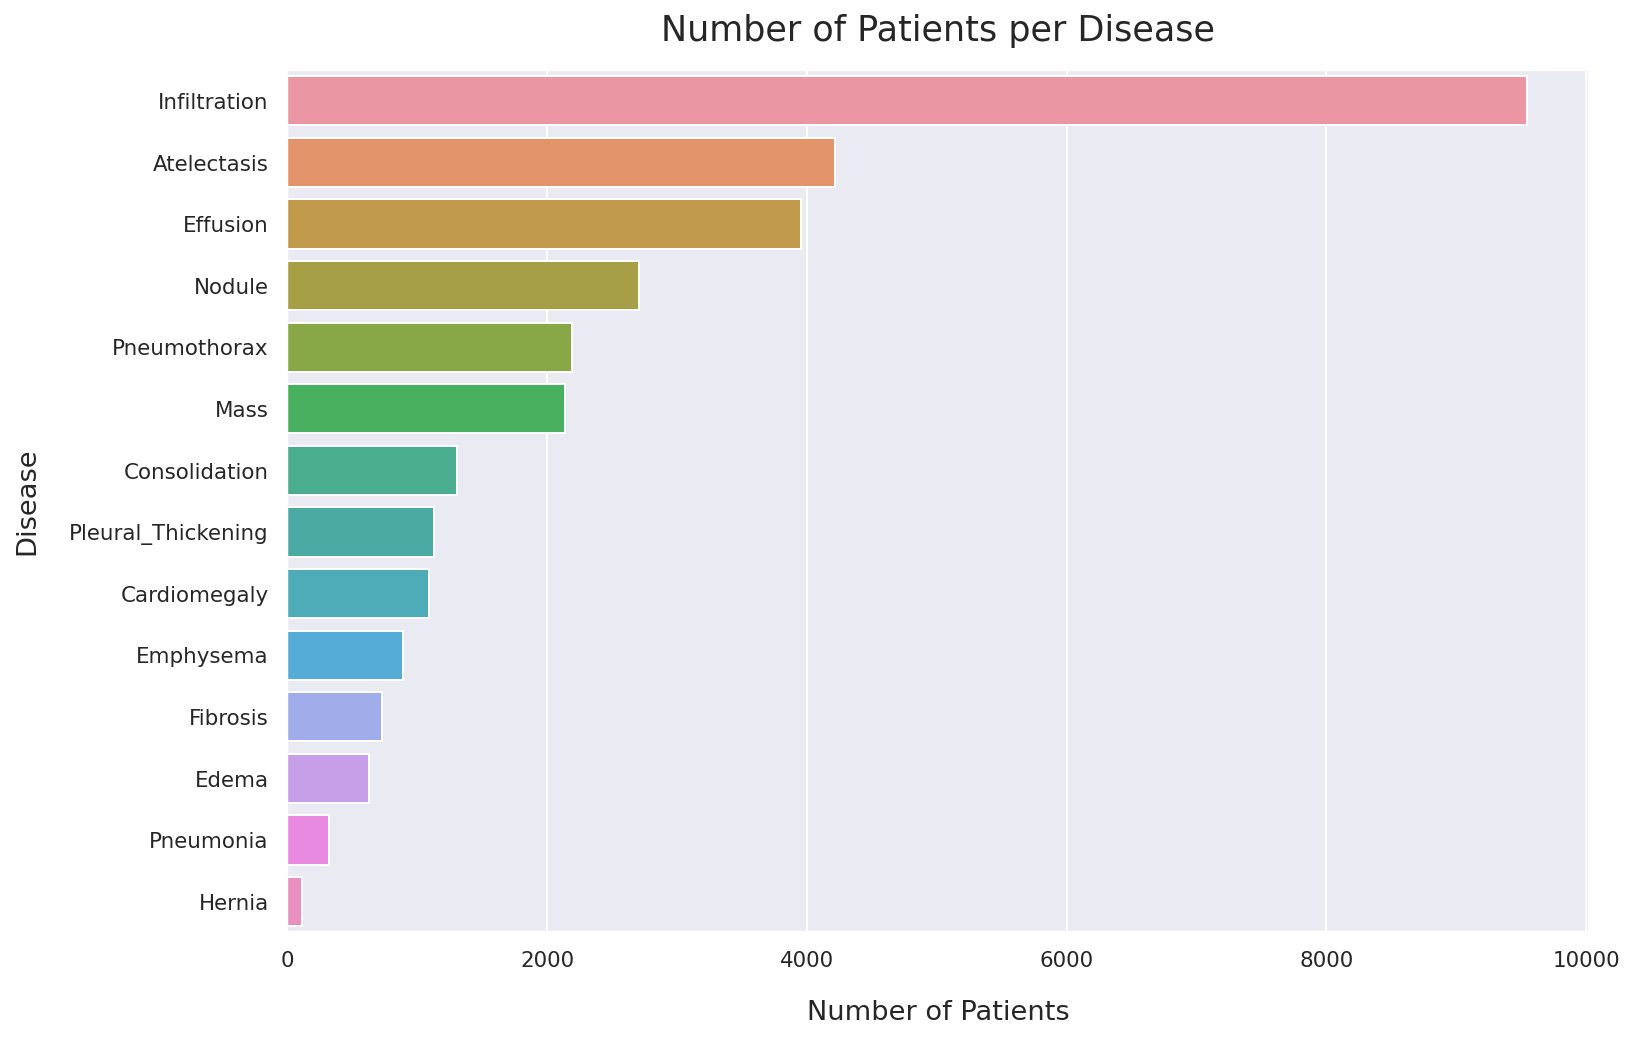

In [78]:
# What are the label counts for each disease?
label_counts_single = single_label_df[labels].sum().sort_values(ascending=False)

# Plot the value counts
plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts_single.values, y=label_counts_single.index)
plt.xlabel('Number of Patients')
plt.ylabel('Disease')
plt.title('Number of Patients per Disease')

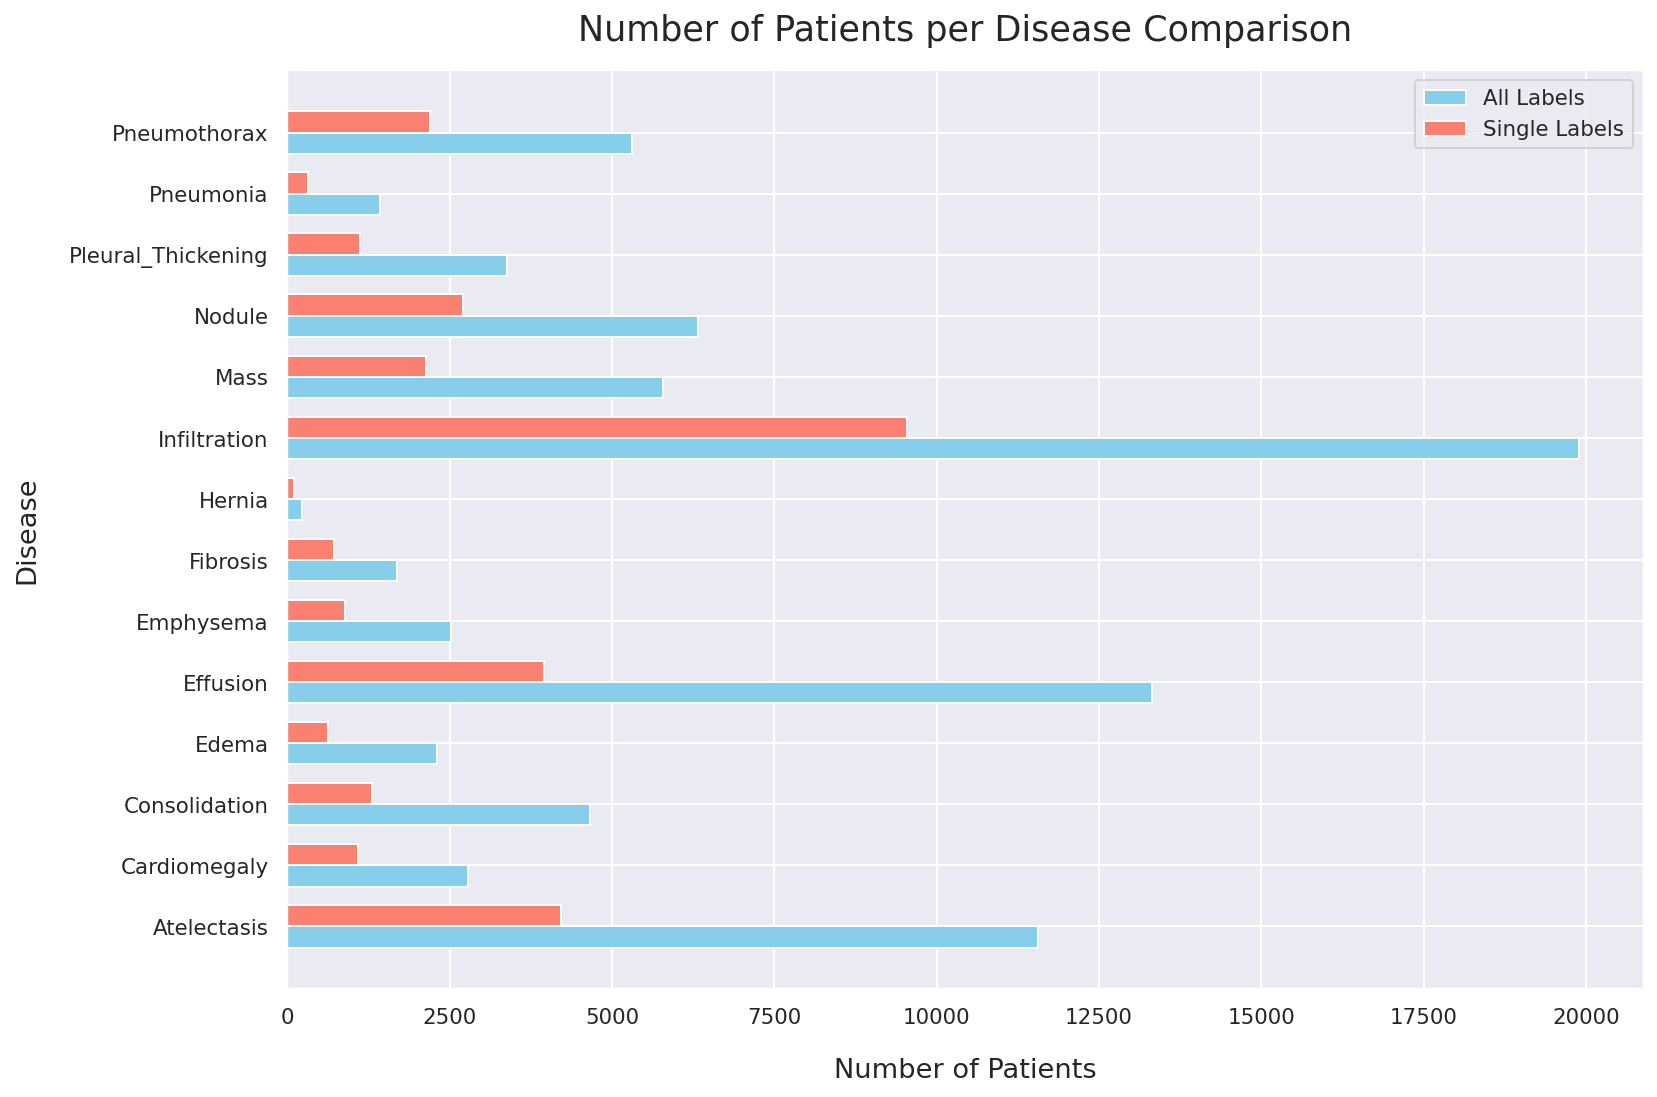

In [81]:
data = pd.DataFrame({'All Labels': label_counts, 'Single Labels': label_counts_single}).sort_index()

# Define positions of the bars
bar_width = 0.35
index = np.arange(len(data_for_plotting))

# Plotting
plt.figure(figsize=(12, 8))
bars1 = plt.barh(index, data['All Labels'], bar_width, color='skyblue', label='All Labels')
bars2 = plt.barh(index + bar_width, data['Single Labels'], bar_width, color='salmon', label='Single Labels')

plt.xlabel('Number of Patients')
plt.ylabel('Disease')
plt.title('Number of Patients per Disease Comparison')
plt.yticks(index + bar_width / 2, data.index)  # Set y-tick labels to be in the middle of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()


Here we can see that the data has been severly reduced such that the data only consists of data which consists of one label. By using only the single labels this might remove important context clues like if you have "infiltration" you most likely have one of the other diseases as well (given the plot above).

- Atelectasis and Pneumonia can sometimes appear similar on X-rays and can also co-occur.
- Effusion can be a complication of diseases like pneumonia, cancer, or heart failure.
- Cardiomegaly can be associated with diseases that cause chronic pressure overload (such as hypertension) or volume overload.
- Pleural Thickening and Effusion can both result from pleural diseases and can sometimes co-exist.
- Fibrosis and Emphysema are both chronic conditions that lead to deteriorating lung function and can affect similar patient populations, such as smokers.

# Looking at the labels and their meaning? 
Are some of them subsets of each other? 

In the NIH Chest X-Ray14 dataset, the labels are not organized in a hierarchy where one label acts as a "global" category encompassing others. Instead, each of the 14 disease labels represents a specific finding or condition that can be independently identified in the chest X-ray images. These labels are used to annotate the images based on the visible signs of these conditions, without implying that one label is a subset or a broader category of another.